In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

data = pd.read_csv('/content/heart.csv')
print('Original shape:', data.shape)
print('Label counts:')
print(data['target'].value_counts())
print('')
dupes = data.duplicated().sum()
print('Duplicate rows:', dupes)
if dupes>0:
    data = data.drop_duplicates()
    print('Dropped duplicates. New shape:', data.shape)
print('')
print('Missing values per column:')
print(data.isnull().sum())
num_cols = data.select_dtypes(include=['int64','float64']).columns.tolist()
imputer = SimpleImputer(strategy='median')
data[num_cols] = imputer.fit_transform(data[num_cols])
print('Total missing after imputation:', data.isnull().sum().sum())
X = data.drop(columns=['target'])
y = data['target']
scaler = StandardScaler()
X_num = X.select_dtypes(include=[np.number])
X_scaled = pd.DataFrame(scaler.fit_transform(X_num), columns=X_num.columns)
X_other = X.select_dtypes(exclude=[np.number])
if not X_other.empty:
    ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
    ohe_df = pd.DataFrame(ohe.fit_transform(X_other), columns=ohe.get_feature_names_out(X_other.columns))
    X_proc = pd.concat([X_scaled.reset_index(drop=True), ohe_df.reset_index(drop=True)], axis=1)
else:
    X_proc = X_scaled
X_train_full, X_test, y_train_full, y_test = train_test_split(X_proc, y, test_size=0.20, random_state=0, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.30, random_state=0, stratify=y_train_full)
print('Train/Val/Test shapes:', X_train.shape, X_val.shape, X_test.shape)
rf = RandomForestClassifier(random_state=0)
try:
    from xgboost import XGBClassifier
    xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=0)
except Exception:
    from sklearn.ensemble import GradientBoostingClassifier
    xgb = GradientBoostingClassifier(random_state=0)
adb = AdaBoostClassifier(random_state=0)
models = {'RandomForest': rf, 'XGBoost': xgb, 'AdaBoost': adb}
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    train_acc = accuracy_score(y_train, model.predict(X_train))
    val_acc = accuracy_score(y_val, model.predict(X_val))
    test_acc = accuracy_score(y_test, model.predict(X_test))
    results[name] = (train_acc, val_acc, test_acc)
    print(f"{name} -> Train: {train_acc:.4f}  Val: {val_acc:.4f}  Test: {test_acc:.4f}")
print('')
print('Summary table:')
print(pd.DataFrame(results, index=['Train','Val','Test']).T)


Original shape: (1025, 14)
Label counts:
target
1    526
0    499
Name: count, dtype: int64

Duplicate rows: 723
Dropped duplicates. New shape: (302, 14)

Missing values per column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
Total missing after imputation: 0
Train/Val/Test shapes: (168, 13) (73, 13) (61, 13)
RandomForest -> Train: 1.0000  Val: 0.7808  Test: 0.9180


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:49:31] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost -> Train: 1.0000  Val: 0.7945  Test: 0.8033
AdaBoost -> Train: 0.9167  Val: 0.8356  Test: 0.8197

Summary table:
                 Train       Val      Test
RandomForest  1.000000  0.780822  0.918033
XGBoost       1.000000  0.794521  0.803279
AdaBoost      0.916667  0.835616  0.819672


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:51:20] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:51:20] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Voting accuracy hard: 0.7365853658536585
Voting accuracy soft: 0.7317073170731707


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:51:22] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:51:23] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:51:23] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:51:24] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:51:24] WARNING: /w

Best weights (1-3 search): [1, 1, 3, 1] CV score: 0.7421662852784134


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:53:06] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:53:06] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:53:06] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:53:07] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:53:07] WARNING: /w

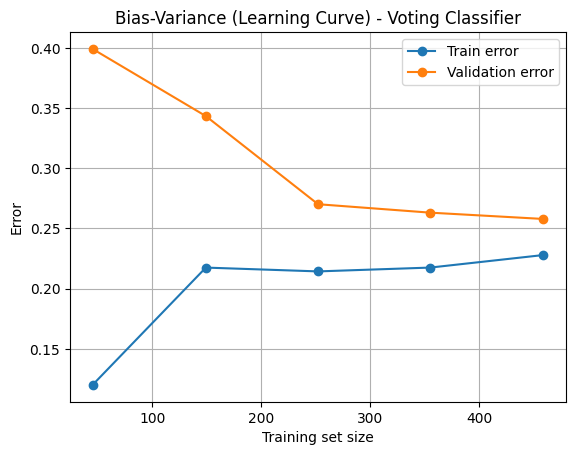

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
import matplotlib.pyplot as plt

df = pd.read_csv('/content/heart.csv')
X2 = df[['restecg','oldpeak']].copy()
y2 = df['target']
if X2['restecg'].dtype not in [np.int64, np.float64, int, float]:
    X2 = pd.get_dummies(X2, columns=['restecg'], drop_first=True)
else:
    X2['restecg'] = X2['restecg'].astype(int)
scaler2 = StandardScaler()
X2_scaled = scaler2.fit_transform(X2)
X2_train_full, X2_test, y2_train_full, y2_test = train_test_split(X2_scaled, y2, test_size=0.20, random_state=0, stratify=y2)
X2_train, X2_val, y2_train, y2_val = train_test_split(X2_train_full, y2_train_full, test_size=0.30, random_state=0, stratify=y2_train_full)
dt = DecisionTreeClassifier(random_state=0)
knn = KNeighborsClassifier()
rf2 = RandomForestClassifier(random_state=0)
try:
    from xgboost import XGBClassifier as XGB2
    xgb2 = XGB2(use_label_encoder=False, eval_metric='logloss', random_state=0)
except Exception:
    from sklearn.ensemble import GradientBoostingClassifier as XGB2
    xgb2 = XGB2(random_state=0)
vc_hard = VotingClassifier(estimators=[('dt',dt),('knn',knn),('rf',rf2),('xgb',xgb2)], voting='hard')
vc_soft = VotingClassifier(estimators=[('dt',dt),('knn',knn),('rf',rf2),('xgb',xgb2)], voting='soft')
vc_hard.fit(X2_train, y2_train)
vc_soft.fit(X2_train, y2_train)
hard_acc = vc_hard.score(X2_test, y2_test)
soft_acc = vc_soft.score(X2_test, y2_test)
print('Voting accuracy hard:', hard_acc)
print('Voting accuracy soft:', soft_acc)
best_score = 0
best_weights = None
for w1 in [1,2,3]:
    for w2 in [1,2,3]:
        for w3 in [1,2,3]:
            for w4 in [1,2,3]:
                weights = [w1,w2,w3,w4]
                vc = VotingClassifier(estimators=[('dt',dt),('knn',knn),('rf',rf2),('xgb',xgb2)], voting='soft', weights=weights)
                try:
                    scores = cross_val_score(vc, X2_train, y2_train, cv=5)
                except Exception:
                    continue
                mean_score = scores.mean()
                if mean_score>best_score:
                    best_score = mean_score
                    best_weights = weights
print('Best weights (1-3 search):', best_weights, 'CV score:', best_score)
vc_best = VotingClassifier(estimators=[('dt',dt),('knn',knn),('rf',rf2),('xgb',xgb2)], voting='soft', weights=best_weights)
train_sizes, train_scores, valid_scores = learning_curve(vc_best, X2_train, y2_train, cv=5, train_sizes=np.linspace(0.1,1.0,5))
train_scores_mean = train_scores.mean(axis=1)
valid_scores_mean = valid_scores.mean(axis=1)
plt.figure()
plt.plot(train_sizes, 1-train_scores_mean, marker='o', label='Train error')
plt.plot(train_sizes, 1-valid_scores_mean, marker='o', label='Validation error')
plt.xlabel('Training set size')
plt.ylabel('Error')
plt.title('Bias-Variance (Learning Curve) - Voting Classifier')
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:54:01] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


RandomForest Train: 0.9006968641114983 Test: 0.8195121951219512
XGBoost/GB Train: 0.8885017421602788 Test: 0.7951219512195122
Voting (RF + AdaBoost) Test accuracy: 0.8341463414634146


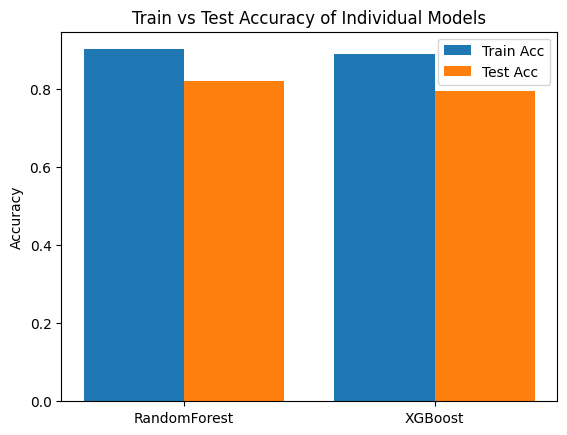

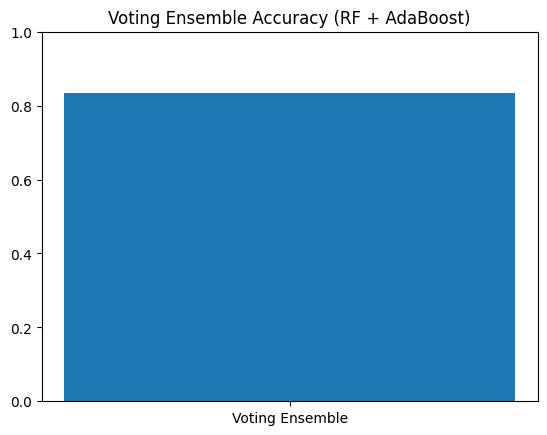

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

df3 = pd.read_csv('/content/heart.csv')
X3 = df3[['restecg','chol']].copy()
y3 = df3['target']
if X3['restecg'].dtype not in [np.int64, np.float64, int, float]:
    X3 = pd.get_dummies(X3, columns=['restecg'], drop_first=True)
else:
    X3['restecg'] = X3['restecg'].astype(int)
scaler3 = StandardScaler()
X3_scaled = scaler3.fit_transform(X3)
X3_train_full, X3_test, y3_train_full, y3_test = train_test_split(X3_scaled, y3, test_size=0.20, random_state=0, stratify=y3)
X3_train, X3_val, y3_train, y3_val = train_test_split(X3_train_full, y3_train_full, test_size=0.30, random_state=0, stratify=y3_train_full)
rf3 = RandomForestClassifier(random_state=0)
adb3 = AdaBoostClassifier(random_state=0)
try:
    from xgboost import XGBClassifier as XGB3
    xgb3 = XGB3(use_label_encoder=False, eval_metric='logloss', random_state=0)
except Exception:
    from sklearn.ensemble import GradientBoostingClassifier as XGB3
    xgb3 = XGB3(random_state=0)
rf3.fit(X3_train, y3_train)
xgb3.fit(X3_train, y3_train)
adb3.fit(X3_train, y3_train)
rf_train_acc = accuracy_score(y3_train, rf3.predict(X3_train))
rf_test_acc = accuracy_score(y3_test, rf3.predict(X3_test))
xgb_train_acc = accuracy_score(y3_train, xgb3.predict(X3_train))
xgb_test_acc = accuracy_score(y3_test, xgb3.predict(X3_test))
vc3 = VotingClassifier(estimators=[('rf',RandomForestClassifier(random_state=0)),('adb',AdaBoostClassifier(random_state=0))], voting='soft')
vc3.fit(X3_train, y3_train)
vc3_acc = accuracy_score(y3_test, vc3.predict(X3_test))
print('RandomForest Train:', rf_train_acc, 'Test:', rf_test_acc)
print('XGBoost/GB Train:', xgb_train_acc, 'Test:', xgb_test_acc)
print('Voting (RF + AdaBoost) Test accuracy:', vc3_acc)
plt.figure()
methods = ['RandomForest','XGBoost']
train_accs = [rf_train_acc, xgb_train_acc]
test_accs = [rf_test_acc, xgb_test_acc]
xpos = np.arange(len(methods))
plt.bar(xpos-0.2, train_accs, width=0.4, label='Train Acc')
plt.bar(xpos+0.2, test_accs, width=0.4, label='Test Acc')
plt.xticks(xpos, methods)
plt.ylabel('Accuracy')
plt.title('Train vs Test Accuracy of Individual Models')
plt.legend()
plt.show()
plt.figure()
plt.bar(['Voting Ensemble'], [vc3_acc])
plt.ylim(0,1)
plt.title('Voting Ensemble Accuracy (RF + AdaBoost)')
plt.show()
